In [1]:
from finiteelementanalysis import discretization_demo_helper_fcns as di_demo
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func_to_interpolate(x, y):
    return 2.0 * x + 3.0 * y + 1.5 * x * y

def derivative_of_that_function(x, y):
    return np.asarray([2.0 + 1.5 * y, 3.0 + 1.5 * x]).reshape((2, 1))

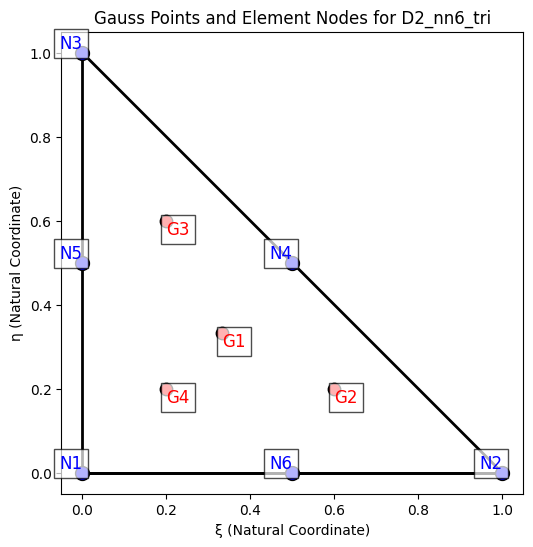

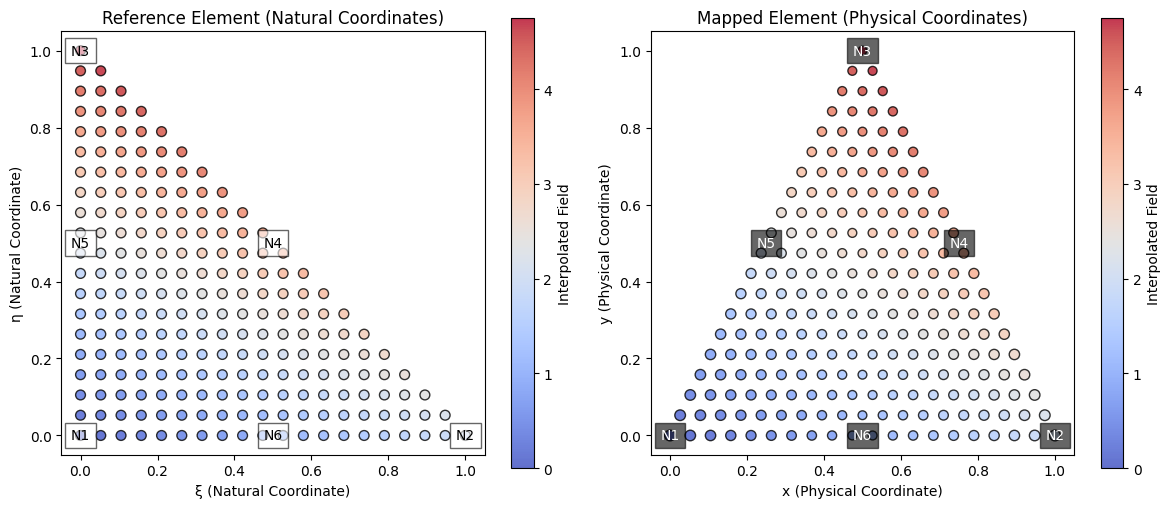

In [3]:
ele_type = "D2_nn6_tri"
num_gauss_pts = 4
fname = "D2_nn3_tri.png"
nodes, edges, gauss_pts, gauss_weights = di_demo.visualize_gauss_pts(fname, ele_type, num_gauss_pts)
# a distorted triangular element
node_coords = np.array([[0.0, 0.0], [1.0, 0.0], [0.5, 1.0]])
internal_nodes = np.array([0.5 * (node_coords[1] + node_coords[2]), 0.5 * (node_coords[0] + node_coords[2]), 0.5 * (node_coords[0] + node_coords[1])])
node_coords = np.concatenate((node_coords, internal_nodes), axis=0)
node_values = np.array([func_to_interpolate(x, y) for x, y in node_coords])
fname = ele_type + "_interpolate_fcn_physical_coords.png"
di_demo.visualize_isoparametric_mapping_single_element(str(fname), ele_type, node_coords, node_values, num_interp_pts=20)

In [4]:
xi, eta = (2.0)**0.5/2/3 * (2.0)**0.5/2, (2.0)**0.5/2/3 * (2.0)**0.5/2

# Map the test point from natural to physical coordinates
x_mapped = di_demo.interpolate_field_natural_coords_single_element(ele_type, node_coords[:, 0], [xi], [eta]).flatten()[0]
y_mapped = di_demo.interpolate_field_natural_coords_single_element(ele_type, node_coords[:, 1], [xi], [eta]).flatten()[0]
# Evaluate the function derivative in physical coordinates
mapped_deriv = derivative_of_that_function(x_mapped, y_mapped)

# Compute the numerical gradient in natural coordinates
gradient_natural = di_demo.interpolate_gradient_natural_coords_single_element(ele_type, node_values, np.array([xi]), np.array([eta]))

# Transform the numerical gradient to physical coordinates
gradient_physical = di_demo.transform_gradient_to_physical(ele_type, node_coords, np.array([xi]), np.array([eta]), gradient_natural).reshape((2, 1))

if np.allclose(mapped_deriv, gradient_physical, atol=10e-10):
    print("analytical and numerical derivatives match!")

analytical and numerical derivatives match!


In [7]:
def fcn(x, y):
    return 3.0 * x + 10.0 * y

def fcn_deriv(x, y):
    return np.asarray([3.0, 10.0])  # df/dx = 3.0, df/dy = 0

def element_area(node_coords):
    node_coords = node_coords[[0, -1, 1, 3, 2, 4]]
    n = len(node_coords)
    area = 0
    for i in range(n-1):
        x1, y1 = node_coords[i]
        x2, y2 = node_coords[i+1]
        area += x1 * y2 - y1 * x2
    area += node_coords[-1][0] * node_coords[0][1] - node_coords[-1][1] * node_coords[0][0]
    return abs(area) / 2

def integral_of_deriv(node_coords):
    area = element_area(node_coords)
    return np.array([3.0 * area, 10.0 * area]).reshape((2, 1))

ele_type = "D2_nn6_tri"
num_gauss_pts = 4
nodal_values = np.array([[fcn(x, y) for x, y in node_coords]]).T

# Compute numerical integral
integral_numerical = di_demo.compute_integral_of_derivative(
    ele_type, num_gauss_pts, node_coords, nodal_values)

# Compute analytical integral
integral_analytical = integral_of_deriv(node_coords)

# check result
if np.allclose(integral_numerical, integral_analytical, atol=10e-10):
    print("analytical and numerical integrals of derivatives match!")

analytical and numerical integrals of derivatives match!
